<a href="https://colab.research.google.com/github/kiran-pyt/Pytorch-Parctise/blob/main/Pytorch_Custom_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.optim import SGD
import random
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
import random

# Generate random 2D list for x
x = [[random.randint(1, 10) for _ in range(2)] for _ in range(100)]

# Generate random 2D list for y
y = [[random.randint(1, 20)] for _ in range(100)]

print("Random x:", x)
print("Random y:", y)



Random x: [[1, 9], [2, 4], [6, 7], [3, 8], [3, 6], [4, 6], [8, 9], [7, 10], [9, 9], [6, 4], [7, 10], [7, 7], [6, 1], [3, 1], [7, 2], [4, 6], [10, 3], [7, 3], [8, 6], [8, 3], [5, 1], [2, 1], [8, 9], [1, 7], [6, 4], [9, 9], [10, 9], [4, 8], [4, 10], [3, 2], [10, 2], [10, 5], [2, 8], [1, 7], [6, 10], [8, 1], [9, 3], [1, 10], [7, 1], [10, 5], [1, 4], [2, 2], [9, 7], [2, 5], [5, 10], [3, 2], [9, 4], [4, 8], [4, 6], [4, 2], [1, 1], [2, 4], [5, 3], [6, 3], [3, 4], [5, 7], [9, 9], [9, 5], [5, 1], [6, 4], [3, 4], [6, 6], [10, 2], [7, 5], [2, 4], [9, 5], [9, 6], [1, 7], [10, 8], [8, 5], [10, 1], [4, 4], [1, 3], [8, 4], [9, 2], [7, 6], [7, 6], [2, 2], [2, 1], [9, 10], [3, 3], [10, 7], [9, 10], [8, 7], [8, 3], [3, 9], [5, 10], [3, 10], [8, 3], [6, 3], [7, 9], [5, 10], [9, 3], [10, 6], [7, 8], [8, 7], [3, 6], [2, 1], [7, 4], [4, 4]]
Random y: [[20], [7], [18], [6], [15], [8], [4], [13], [6], [3], [2], [19], [6], [20], [16], [10], [18], [6], [6], [4], [5], [1], [14], [18], [9], [16], [16], [15], [18

In [3]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
  def __len__(self):
    return len(self.x)
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [5]:
ds=MyDataset(x,y)

In [6]:
dl=DataLoader(ds, batch_size=2, shuffle=True)

In [7]:
# Example usage: Iterating through the DataLoader
for batch_idx, (features, targets) in enumerate(dl):
    print(f"Batch {batch_idx + 1}")
    print("Features:", features)
    print("Targets:", targets)

Batch 1
Features: tensor([[3., 6.],
        [9., 5.]])
Targets: tensor([[12.],
        [ 4.]])
Batch 2
Features: tensor([[8., 3.],
        [3., 1.]])
Targets: tensor([[20.],
        [20.]])
Batch 3
Features: tensor([[ 6.,  4.],
        [ 1., 10.]])
Targets: tensor([[3.],
        [2.]])
Batch 4
Features: tensor([[3., 6.],
        [2., 2.]])
Targets: tensor([[15.],
        [17.]])
Batch 5
Features: tensor([[6., 3.],
        [8., 1.]])
Targets: tensor([[10.],
        [17.]])
Batch 6
Features: tensor([[1., 3.],
        [9., 9.]])
Targets: tensor([[ 7.],
        [13.]])
Batch 7
Features: tensor([[10.,  2.],
        [ 7., 10.]])
Targets: tensor([[18.],
        [ 2.]])
Batch 8
Features: tensor([[7., 1.],
        [7., 2.]])
Targets: tensor([[18.],
        [16.]])
Batch 9
Features: tensor([[10.,  8.],
        [ 1.,  7.]])
Targets: tensor([[13.],
        [18.]])
Batch 10
Features: tensor([[6., 4.],
        [2., 4.]])
Targets: tensor([[9.],
        [5.]])
Batch 11
Features: tensor([[ 5., 10.],
  

In [18]:
# Access specific items directly using __getitem__
index = 2  # Get the item at index 2
feature, label = ds[index]
print(f"Features at index {index}: {feature}, Label: {label}")

Features at index 2: tensor([6., 7.]), Label: tensor([18.])


In [8]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):#def __init__(self,input_size,output_size)
        super(MyNeuralNetwork,self).__init__()
        self.input_to_hidden_layer=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Linear(8,1)
    def forward(self,x):
        x=self.input_to_hidden_layer(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output_layer(x)
        return x


In [11]:

def my_mean_squared_error(_y, y):
    loss = (_y-y)**2
    loss = loss.mean()
    return loss

In [9]:
mynet=MyNeuralNetwork().to(device)
loss_func=nn.MSELoss()
optimizer=SGD(mynet.parameters(), lr=0.001)

In [ ]:
loss_func()

In [12]:
loss_history=[]
loss_history1=[]
for _ in range(50):
  for data in dl:
    x,y=data
    optimizer.zero_grad()
    loss_value1=my_mean_squared_error(mynet(x),y)
    loss_value=loss_func(mynet(x),y)
    loss_value.backward()
    optimizer.step()
    loss_history.append(loss_value.item())
    loss_history1.append(loss_value1.item())

In [13]:
loss_history

[17.922237396240234,
 31.429344177246094,
 62.80742645263672,
 118.3251953125,
 6.647233963012695,
 38.73960876464844,
 43.35074996948242,
 52.63710403442383,
 65.8916015625,
 42.526607513427734,
 13.9330472946167,
 21.369138717651367,
 19.80272102355957,
 32.388946533203125,
 17.294803619384766,
 65.80831146240234,
 44.9132080078125,
 6.709435939788818,
 62.88142776489258,
 26.057621002197266,
 55.3572883605957,
 50.792381286621094,
 6.900094032287598,
 28.782760620117188,
 14.135865211486816,
 34.25149154663086,
 11.748124122619629,
 32.331993103027344,
 10.305538177490234,
 42.44413757324219,
 108.00862121582031,
 63.27481460571289,
 95.96878814697266,
 52.917572021484375,
 6.231204032897949,
 30.365013122558594,
 47.292938232421875,
 4.695243835449219,
 44.484317779541016,
 27.359468460083008,
 17.926326751708984,
 29.97456169128418,
 45.96218490600586,
 28.608245849609375,
 18.118022918701172,
 72.72251892089844,
 26.345226287841797,
 15.940954208374023,
 40.10060501098633,
 0.311

In [14]:
loss_history1

[17.922237396240234,
 31.429344177246094,
 62.80742645263672,
 118.3251953125,
 6.647233963012695,
 38.73960876464844,
 43.35074996948242,
 52.63710403442383,
 65.8916015625,
 42.526607513427734,
 13.9330472946167,
 21.369138717651367,
 19.80272102355957,
 32.388946533203125,
 17.294803619384766,
 65.80831146240234,
 44.9132080078125,
 6.709435939788818,
 62.88142776489258,
 26.057621002197266,
 55.3572883605957,
 50.792381286621094,
 6.900094032287598,
 28.782760620117188,
 14.135865211486816,
 34.25149154663086,
 11.748124122619629,
 32.331993103027344,
 10.305538177490234,
 42.44413757324219,
 108.00862121582031,
 63.27481460571289,
 95.96878814697266,
 52.917572021484375,
 6.231204032897949,
 30.365013122558594,
 47.292938232421875,
 4.695243835449219,
 44.484317779541016,
 27.359468460083008,
 17.926326751708984,
 29.97456169128418,
 45.96218490600586,
 28.608245849609375,
 18.118022918701172,
 72.72251892089844,
 26.345226287841797,
 15.940954208374023,
 40.10060501098633,
 0.311

Text(0, 0.5, 'loss value')

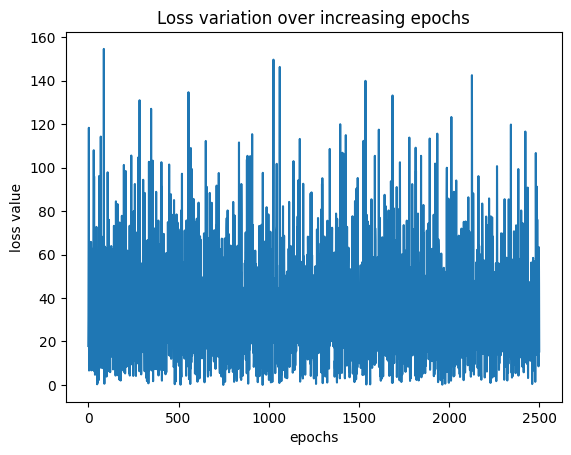

In [15]:
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

Text(0, 0.5, 'loss value')

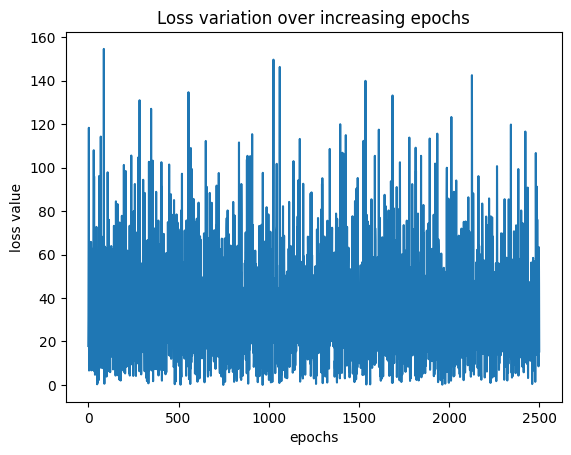

In [16]:
%matplotlib inline
plt.plot(loss_history1)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')